In [70]:
import json
import pickle
import socket
from ast import Not
from pathlib import Path
import glob
import numpy as np
import tqdm

from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [5]:
def load_adni(
    datasets={"ADNI2", "ADNI2-2"},
    classes={
        "CN",
        "AD",
        "MCI",
        "EMCI",
        "LMCI",
        "SMC",
    },
    size="half", # full or half
    unique=True,
    blacklist=True,
    not_csv = False,
    dryrun=False,
    
):
    root_dir = "/data2" if socket.gethostname().startswith("plant-ai") else "/home"
    folder = glob.glob(root_dir + "/radiology_datas/clean/meta/json/*")
    all_subjects = []
    for f in folder:
        all_subjects += json.loads(Path(f).read_text())
                       
    matching_images = []
    for subject in all_subjects:
        if subject["dataset"] not in datasets:
            continue
        if subject["class"] not in classes:
            continue
        if not_csv and subject["not_csv"]:
            continue
        
        for image in subject["images"]:
            if image["blacklisted"] and blacklist:
                continue
            image["pid"] = subject["id"]
            image["class"] = subject["class"]
            image["dataset"] = subject["dataset"]
            matching_images.append(image)
            if unique:
                break
                
    if not dryrun:
        image_loaders = {
            ".pkl": lambda pkl_path: pickle.loads(pkl_path.read_bytes()),
            ".npy": lambda npy_path: np.load(npy_path),
        }

        for image in tqdm.tqdm(matching_images):
            if size == "half":
                img_path = root_dir / Path(image["halfsize_img_path"])
            if size == "full":
                img_path = root_dir / Path(image["fullsize_img_path"])
            image["voxel"] = image_loaders[img_path.suffix](img_path)
                    
    return matching_images

    

In [6]:
images = load_adni()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 1401/1401 [01:19<00:00, 17.66it/s]


In [21]:
samp = images[0]['voxel']
#plt.imshow(images[0]['voxel'], cmap="gray")

In [29]:
type(samp)

numpy.ndarray

In [65]:
samp.shape

(80, 96, 80)

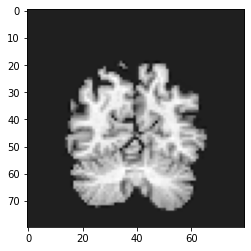

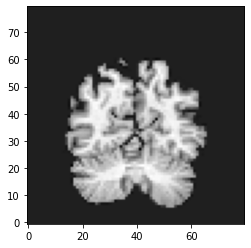

In [92]:
#plt.imshow(samp)
plt.imshow(np.rot90(samp[:,28,:]), cmap="gray");plt.pause(0.001)
plt.imshow(samp[:,28,:].T, origin='lower', cmap="gray")

In [64]:
samp[55,:,:].shape

(96, 80)

In [69]:
samp.shape

(80, 96, 80)

In [68]:
samp[55,:,55]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        9.38705727e-02,  9.11367950e+01,  1.25770638e+02,  1.50545288e+02,
        1.37422089e+02,  1.60816452e+02,  1.83878677e+02,  1.48733414e+02,
        1.55523865e+02,  1.73952377e+02,  9.70788574e+01,  2.87741947e+00,
       -7.16970742e-01, -4.57542753e+00, -1.42305028e+00, -6.72615814e+00,
        1.34253311e+02,  1.60087067e+02,  1.30316803e+02,  5.69070816e+00,
        1.13859360e+02,  